In [1]:
import tensorflow as tf
import zipfile
import os

#zip_ref = zipfile.ZipFile('drive/My Drive/Colab Notebooks/ALL DATA/smaller_animals.zip', 'r')
#zip_ref.extractall(path='drive/My Drive/Colab Notebooks/ALL DATA/animals') # unzip file
#zip_ref.close()

#!unzip -q 'drive/My Drive/Colab Notebooks/ALL DATA/zips/smaller_animals.zip' -d 'drive/My Drive/Colab Notebooks/ALL DATA/animals'

In [2]:
#!rm -rf '/content/drive/My Drive/Colab Notebooks/ALL DATA/__MACOSX'

In [3]:
#base_dir = "drive/My Drive/Colab Notebooks/ALL DATA/animals"
base_dir = '/home/srikumar/Desktop/'
#base_dir = "/Users/sanjay/Desktop/CODE/Python/Animal-Classification/DATA"
class_names = ['cat', 'lynx', 'wolf', 'coyote', 'cheetah', 'jaguar', 'chimpanzee', 'orangutan', 'hamster', 'guinea pig']
print('[DATA] READ IN ZIP')
date_base = os.path.join(base_dir,'animals')


[DATA] READ IN ZIP


In [4]:
import os.path
from os import path
import glob
import shutil
for folder in os.listdir(date_base):
  print(folder)
  if(folder =='.DS_Store'):
    continue
  if not(path.exists(os.path.join(date_base, folder,'sorted'))): #makes sorted folder 
    print('Made sorted in ', folder )
    os.mkdir(os.path.join(date_base, folder,'sorted'))
  #Splits up images into categorized directories
  for image in os.listdir(os.path.join(date_base, folder)):
    if not('_img_' in image):
      continue
    animal = image.split("_img_")[0]
    target_dir = os.path.join(date_base,folder,'sorted',animal)
    if not os.path.isdir(target_dir):
        os.mkdir(target_dir)
    if not path.exists(os.path.join(target_dir, image)): #if image hasnt been copied over
        shutil.copy(os.path.join(date_base,folder,image), os.path.join(target_dir,image))  
print('done!') 



training
testing
done!


# Keras ImageDataGenerator/Images as numpy array

---



In [7]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import *
from keras.preprocessing.image import img_to_array
from imutils import paths
import numpy as np
import os
import cv2


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    os.path.join(date_base, 'training', 'sorted'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    os.path.join(date_base, 'testing', 'sorted'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

#Data in np arrays
data = []
labels = []
print('running1')
imagePaths = sorted(list(paths.list_images(date_base+'/training')))
for imagePath in imagePaths:
	#load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	try:
		image = cv2.resize(image,(28,28))
		image = img_to_array(image)
		data.append(image)
		# extract the class label from the image path and update the labels list
		label = imagePath.split(os.path.sep)[-1]
		labels.append(label[0]) #strips the number label from the front
	except:
		print('Skipped')
 # scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
x_train, y_train = data, labels

print('finished running1')

#Data in np arrays
data = []
labels = []
print('running2')

imagePaths = sorted(list(paths.list_images(date_base+'/testing')))
for imagePath in imagePaths:
	#load the image, pre-process it, and store it in the data list
  image = cv2.imread(imagePath)
  try:
    image = cv2.resize(image,(28,28))
    image = img_to_array(image)
    data.append(image)
		# extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-1]
    labels.append(label[0]) #strips the number label from the front
  except:
    print('Skipped')
 # scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
x_test, y_test = data, labels

# Normalizing the input image
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#Converting labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print('done')

Found 10993 images belonging to 10 classes.
Found 44006 images belonging to 10 classes.
running1
finished running1
running2
done


# Models

### CNN

In [ ]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
import numpy as np

class CNN:
  @staticmethod
  def build():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=(128,128,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(class_names)))
    model.add(Activation('softmax'))
    return model

CNN_Model = CNN.build()
CNN_Model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


history = CNN_Model.fit_generator(
    train_generator, 
    steps_per_epoch=160, #5097 images/batches of 128 = ~160
    epochs=30, 
    validation_data= test_generator, 
    validation_steps=33,#1063 images/batchest of 32= 33
    verbose=1 #how much to display when training occurs.@2, hides epoch progress
)

      
  

### VGG19

In [9]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19, VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
from keras.utils import to_categorical
import tensorflow as tf
import random

#Defining the hyperparameters
batch_size= 100
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)
base_model_VGG19 = VGG19(include_top=False, weights='imagenet', input_shape=(128,128,3), classes=y_train.shape[1])
class VGG19:
        @staticmethod
        def build():
            model = Sequential()
            model.add(base_model_VGG19) 
            model.add(Flatten()) 
            model.add(Dense(1024,activation=('relu'),input_dim=512))
            model.add(Dense(512,activation=('relu'))) 
            model.add(Dense(256,activation=('relu'))) 
            #model_vgg19.add(Dropout(.3))
            model.add(Dense(128,activation=('relu')))
            #model_vgg19.add(Dropout(.2))
            model.add(Dense(10,activation=('softmax')))
            return model

#Compiling the VGG19 model
VGG19_model = VGG19.build()
VGG19_model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history = VGG19_model.fit_generator(
    train_generator, 
    steps_per_epoch=880, #1024 images/batches of 128 = 8
    epochs=50, 
    validation_data= test_generator, 
    validation_steps=219, #256 images/batchest of 32 = 8
    callbacks = [lrr],
    verbose=1 #how much to display when training occurs.@2, hides epoch progress
)



Epoch 1/50
880/880 [==============================] - 168s 191ms/step - loss: 1.2495 - acc: 0.5386 - val_loss: 0.8902 - val_acc: 0.6804
Epoch 2/50
880/880 [==============================] - 153s 174ms/step - loss: 0.7275 - acc: 0.7348 - val_loss: 0.8035 - val_acc: 0.7142
Epoch 3/50
880/880 [==============================] - 153s 174ms/step - loss: 0.5630 - acc: 0.7940 - val_loss: 0.8133 - val_acc: 0.7217
Epoch 4/50
880/880 [==============================] - 154s 175ms/step - loss: 0.4283 - acc: 0.8436 - val_loss: 0.8678 - val_acc: 0.7186
Epoch 5/50
880/880 [==============================] - 153s 174ms/step - loss: 0.3397 - acc: 0.8735 - val_loss: 1.0005 - val_acc: 0.7132
Epoch 6/50
880/880 [==============================] - 153s 174ms/step - loss: 0.2697 - acc: 0.9026 - val_loss: 0.9208 - val_acc: 0.7389
Epoch 7/50
880/880 [==============================] - 153s 174ms/step - loss: 0.2037 - acc: 0.9265 - val_loss: 1.1361 - val_acc: 0.7219
Epoch 8/50
880/880 [============================

### Plotting Training Accuracy

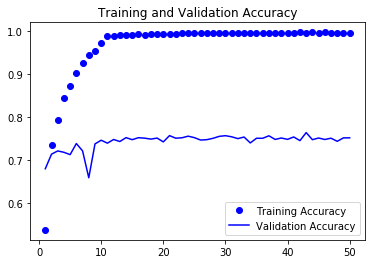

In [11]:
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
epochs = range(1,EPOCHS+1)
plt.plot(epochs,train_acc,'bo',label='Training Accuracy')
plt.plot(epochs,validation_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

model.save()

# Upload and Test


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  imgplot = plt.imshow(img)
  plt.show() 
  images = np.vstack([x])
  classes = CNN_Model.predict(images, batch_size=1)
  print(type(classes))
  index_min = np.argmin(classes)
  print(fn + f" is a {class_names[index_min]}")